In [127]:
import numpy as np
import math
import torch
import matplotlib.pyplot as plt


A TRAINING SET

In [128]:
dev=torch.device("cuda:0")
X=torch.linspace(-math.pi,+math.pi,2000,device=dev)
y=torch.sin(X)
print(X)
print(y)

tensor([-3.1416, -3.1384, -3.1353,  ...,  3.1353,  3.1384,  3.1416],
       device='cuda:0')
tensor([ 8.7423e-08, -3.1430e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1430e-03, -8.7423e-08], device='cuda:0')


RANDOM INITIALIZATION OF PARAMETERS

In [129]:
b=torch.randn((),device=dev)
w1=torch.randn((),device=dev)
w2=torch.randn((),device=dev)
w3=torch.randn((),device=dev)



In [130]:
print(b)
print(w1)
print(w2)
print(w3)

tensor(0.5725, device='cuda:0')
tensor(-0.2080, device='cuda:0')
tensor(-0.7063, device='cuda:0')
tensor(0.3185, device='cuda:0')


TRAINING THE MODEL USING THE SUM OF SQUARED ERROR

In [131]:
num_epochs=4000
learning_rate=3e-6
l=[]

In [132]:
for i in range(num_epochs):
  y_pred=b + w1*X + w2*(X**2) + w3*(X**3)
  loss=((y_pred-y)**2).sum().item()
  
  if(i%100==99):
    print("Loss after {}th iteration is {}".format(i+1,loss))
    l.append(loss)
  grad_y_pred=2*(y_pred-y)
  grad_b=  grad_y_pred.sum()
  grad_w1= (X*grad_y_pred).sum()
  grad_w2=((X**2)*grad_y_pred).sum()
  grad_w3= ((X**3)*grad_y_pred).sum()
  b=b-learning_rate*grad_b
  w1=w1-learning_rate*grad_w1
  w2=w2-learning_rate*grad_w2
  w3=w3-learning_rate*grad_w3



Loss after 100th iteration is 526.46142578125
Loss after 200th iteration is 167.5467529296875
Loss after 300th iteration is 57.934627532958984
Loss after 400th iteration is 24.164222717285156
Loss after 500th iteration is 13.661206245422363
Loss after 600th iteration is 10.362044334411621
Loss after 700th iteration is 9.31501579284668
Loss after 800th iteration is 8.979251861572266
Loss after 900th iteration is 8.87045669555664
Loss after 1000th iteration is 8.834850311279297
Loss after 1100th iteration is 8.82308578491211
Loss after 1200th iteration is 8.81916332244873
Loss after 1300th iteration is 8.81784439086914
Loss after 1400th iteration is 8.817398071289062
Loss after 1500th iteration is 8.817246437072754
Loss after 1600th iteration is 8.817194938659668
Loss after 1700th iteration is 8.817176818847656
Loss after 1800th iteration is 8.817170143127441
Loss after 1900th iteration is 8.817168235778809
Loss after 2000th iteration is 8.817167282104492
Loss after 2100th iteration is 8

Text(0, 0.5, 'COST')

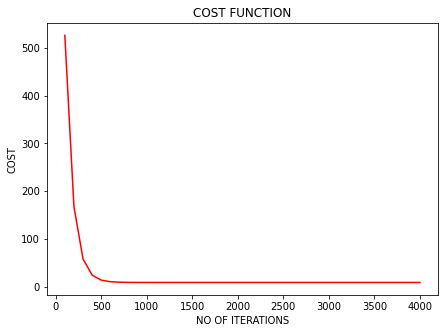

In [133]:
plt.figure(figsize=(7,5))
plt.plot(np.arange(100,4100,step=100),l,color='red')
plt.title("COST FUNCTION")
plt.xlabel("NO OF ITERATIONS")
plt.ylabel("COST")


In [134]:
print(b)
print(w1)
print(w2)
print(w3)

tensor(8.0589e-09, device='cuda:0')
tensor(0.8567, device='cuda:0')
tensor(-1.0936e-08, device='cuda:0')
tensor(-0.0933, device='cuda:0')


In [135]:
print(y_pred-y)

tensor([ 0.2023,  0.1995,  0.1966,  ..., -0.1966, -0.1995, -0.2023],
       device='cuda:0')
